In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv("credit_risk.csv")

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.isna().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [5]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
data.isna().sum()/len(data)*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [7]:
df=data.dropna()

In [8]:
print("before dropping",len(data))
print("after dropping",len(df))
print("after dropping %",len(df)/len(data)*100)

before dropping 614
after dropping 480
after dropping % 78.17589576547232


# Exploratory Analysis

In [9]:
# Generate hypothesis: Atleast 5


In [12]:
df.groupby(["Property_Area","Loan_Status"])["Loan_ID"].\
                    count()/df.groupby(["Property_Area"])["Loan_ID"].count()

Property_Area  Loan_Status
Rural          N              0.388489
               Y              0.611511
Semiurban      N              0.219895
               Y              0.780105
Urban          N              0.346667
               Y              0.653333
Name: Loan_ID, dtype: float64

In [13]:
df.groupby(["Self_Employed","Loan_Status"])["Loan_ID"].\
count()/df.groupby(["Self_Employed"])["Loan_ID"].count()

Self_Employed  Loan_Status
No             N              0.301932
               Y              0.698068
Yes            N              0.348485
               Y              0.651515
Name: Loan_ID, dtype: float64

In [14]:
df.groupby(["Self_Employed","Married"])["Loan_ID"].\
count()/df.groupby(["Self_Employed"])["Loan_ID"].count()

Self_Employed  Married
No             No         0.355072
               Yes        0.644928
Yes            No         0.333333
               Yes        0.666667
Name: Loan_ID, dtype: float64

In [15]:
df.groupby(["Self_Employed","Gender"])["Loan_ID"].\
count()/df.groupby(["Self_Employed"])["Loan_ID"].count()

Self_Employed  Gender
No             Female    0.178744
               Male      0.821256
Yes            Female    0.181818
               Male      0.818182
Name: Loan_ID, dtype: float64

In [16]:
df.groupby(["Self_Employed","Education"])["Loan_ID"].\
count()/df.groupby(["Self_Employed"])["Loan_ID"].count()

Self_Employed  Education   
No             Graduate        0.797101
               Not Graduate    0.202899
Yes            Graduate        0.803030
               Not Graduate    0.196970
Name: Loan_ID, dtype: float64

In [17]:
df.groupby(["Education","Property_Area","Loan_Status"])["Loan_ID"].\
count()/df.groupby(["Education","Property_Area"])["Loan_ID"].count()

Education     Property_Area  Loan_Status
Graduate      Rural          N              0.352381
                             Y              0.647619
              Semiurban      N              0.224359
                             Y              0.775641
              Urban          N              0.327869
                             Y              0.672131
Not Graduate  Rural          N              0.500000
                             Y              0.500000
              Semiurban      N              0.200000
                             Y              0.800000
              Urban          N              0.428571
                             Y              0.571429
Name: Loan_ID, dtype: float64

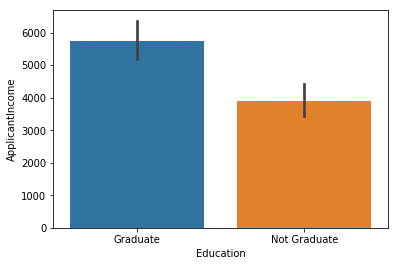

In [18]:
sns.barplot(x="Education",y="ApplicantIncome",data=df)

In [19]:
df.groupby(["Dependents","Loan_Status"])["Loan_ID"].\
count()/df.groupby(["Dependents"])["Loan_ID"].count()

Dependents  Loan_Status
0           N              0.317518
            Y              0.682482
1           N              0.350000
            Y              0.650000
2           N              0.235294
            Y              0.764706
3+          N              0.317073
            Y              0.682927
Name: Loan_ID, dtype: float64

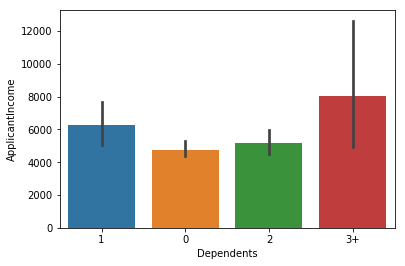

In [20]:
sns.barplot(x="Dependents",y="ApplicantIncome",data=df)

In [21]:
df.groupby(["Education","Gender","Loan_Status"])["Loan_ID"].\
count()/df.groupby(["Education","Gender"])["Loan_ID"].count()

Education     Gender  Loan_Status
Graduate      Female  N              0.383562
                      Y              0.616438
              Male    N              0.270968
                      Y              0.729032
Not Graduate  Female  N              0.307692
                      Y              0.692308
              Male    N              0.380952
                      Y              0.619048
Name: Loan_ID, dtype: float64

In [22]:
df.groupby(["Married","Loan_Status"])["Loan_ID"].\
count()/df.groupby(["Married"])["Loan_ID"].count()

Married  Loan_Status
No       N              0.378698
         Y              0.621302
Yes      N              0.270096
         Y              0.729904
Name: Loan_ID, dtype: float64

In [23]:
df.groupby(["Married","Self_Employed","Loan_Status"])["Loan_ID"].\
count()/df.groupby(["Married","Self_Employed"])["Loan_ID"].count()

Married  Self_Employed  Loan_Status
No       No             N              0.367347
                        Y              0.632653
         Yes            N              0.454545
                        Y              0.545455
Yes      No             N              0.265918
                        Y              0.734082
         Yes            N              0.295455
                        Y              0.704545
Name: Loan_ID, dtype: float64

In [24]:
df.groupby(["Married","Education","Loan_Status"])["Loan_ID"].\
count()/df.groupby(["Married","Education"])["Loan_ID"].count()

Married  Education     Loan_Status
No       Graduate      N              0.385185
                       Y              0.614815
         Not Graduate  N              0.352941
                       Y              0.647059
Yes      Graduate      N              0.241935
                       Y              0.758065
         Not Graduate  N              0.380952
                       Y              0.619048
Name: Loan_ID, dtype: float64

In [25]:
df.groupby(["Married","Self_Employed","Education","Loan_Status"])["Loan_ID"].\
count()/df.groupby(["Married","Self_Employed","Education"])["Loan_ID"].count()

Married  Self_Employed  Education     Loan_Status
No       No             Graduate      N              0.369748
                                      Y              0.630252
                        Not Graduate  N              0.357143
                                      Y              0.642857
         Yes            Graduate      N              0.500000
                                      Y              0.500000
                        Not Graduate  N              0.333333
                                      Y              0.666667
Yes      No             Graduate      N              0.236967
                                      Y              0.763033
                        Not Graduate  N              0.375000
                                      Y              0.625000
         Yes            Graduate      N              0.270270
                                      Y              0.729730
                        Not Graduate  N              0.428571
                    

In [26]:
sum(df.ApplicantIncome>df.CoapplicantIncome)/len(df)

0.88125

In [27]:
df.groupby(["Credit_History","Loan_Status"])["Loan_ID"].\
count()/df.groupby(["Credit_History"])["Loan_ID"].count()

Credit_History  Loan_Status
0.0             N              0.900000
                Y              0.100000
1.0             N              0.207317
                Y              0.792683
Name: Loan_ID, dtype: float64

In [28]:
df.groupby(["Credit_History","Married","Loan_Status"])["Loan_ID"].\
count()/df.groupby(["Credit_History","Married"])["Loan_ID"].count()

Credit_History  Married  Loan_Status
0.0             No       N              0.888889
                         Y              0.111111
                Yes      N              0.906977
                         Y              0.093023
1.0             No       N              0.281690
                         Y              0.718310
                Yes      N              0.167910
                         Y              0.832090
Name: Loan_ID, dtype: float64

In [29]:
df[(df.Credit_History==0) & (df.Loan_Status=="Y")]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
122,LP001431,Female,No,0,Graduate,No,2137,8980.0,137.0,360.0,0.0,Semiurban,Y
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
201,LP001677,Male,No,2,Graduate,No,4923,0.0,166.0,360.0,0.0,Semiurban,Y
267,LP001882,Male,Yes,3+,Graduate,No,4333,1811.0,160.0,360.0,0.0,Urban,Y
326,LP002068,Male,No,0,Graduate,No,4917,0.0,130.0,360.0,0.0,Rural,Y
453,LP002449,Male,Yes,0,Graduate,No,2483,2466.0,90.0,180.0,0.0,Rural,Y
527,LP002706,Male,Yes,1,Not Graduate,No,5285,1430.0,161.0,360.0,0.0,Semiurban,Y


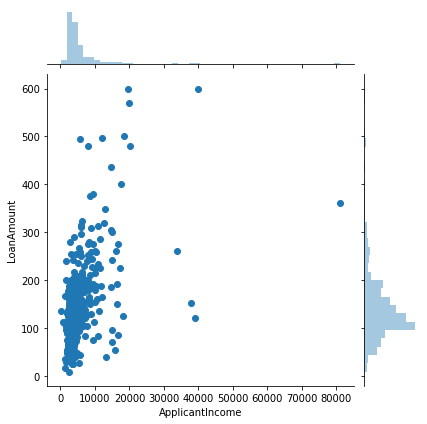

In [30]:
sns.jointplot(df.ApplicantIncome,df.LoanAmount)

C:\Users\48585\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Corr 0.55391385474627
Corr below 20000USD 0.6896197124145877


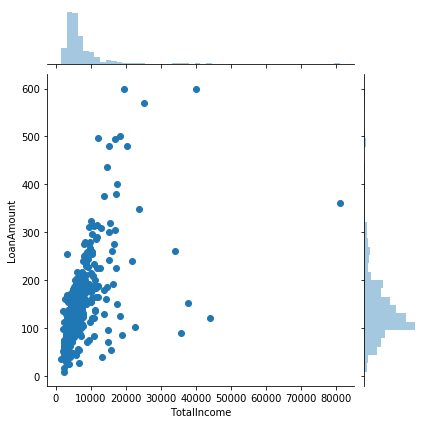

In [31]:
df["TotalIncome"]=df.ApplicantIncome+df.CoapplicantIncome
sns.jointplot(df.TotalIncome,df.LoanAmount)
from scipy.stats import pearsonr
print("Corr",pearsonr(df.TotalIncome,df.LoanAmount)[0])
print("Corr below 20000USD",pearsonr(df[df.TotalIncome<20000].TotalIncome,df[df.TotalIncome<20000].LoanAmount)[0])

In [35]:
df[(df.Self_Employed=="Yes")&(df.Property_Area=="Rural")&(df.Gender=="Male")].Loan_Status.value_counts()

Y    14
N     6
Name: Loan_Status, dtype: int64

In [40]:
#pd.DataFrame(data={"dependant1":df.Dependents==1,"dependant2":df.Dependents==2})
df[df.Dependents=="1"]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,23809.0
21,LP001046,Male,Yes,1,Graduate,No,5955,5625.0,315.0,360.0,1.0,Urban,Y,11580.0
32,LP001097,Male,No,1,Graduate,Yes,4692,0.0,106.0,360.0,1.0,Rural,N,4692.0
46,LP001138,Male,Yes,1,Graduate,No,5649,0.0,44.0,360.0,1.0,Urban,Y,5649.0
54,LP001186,Female,Yes,1,Graduate,Yes,11500,0.0,286.0,360.0,0.0,Urban,N,11500.0
58,LP001198,Male,Yes,1,Graduate,No,8080,2250.0,180.0,360.0,1.0,Urban,Y,10330.0
67,LP001233,Male,Yes,1,Graduate,No,10750,0.0,312.0,360.0,1.0,Urban,Y,10750.0
77,LP001259,Male,Yes,1,Graduate,Yes,1000,3022.0,110.0,360.0,1.0,Urban,N,4022.0
84,LP001275,Male,Yes,1,Graduate,No,3988,0.0,50.0,240.0,1.0,Urban,Y,3988.0


# Data Cleaning

In [41]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
TotalIncome          float64
dtype: object

In [44]:
df.Loan_Status.unique()

array(['N', 'Y'], dtype=object)

In [45]:
def data_cleaning(x):
    x=x.copy()
    x.Gender=x.Gender.map(lambda y: 0 if y=="Male" else 1)
    x.Married=x.Married.map(lambda y: 0 if y=="Yes" else 1)
    x.Dependents=x.Dependents.map(lambda y: 3 if y=="3+" else int(y))
    x.Education=x.Education.map(lambda y: 0 if y=="Graduate" else 1)
    x.Self_Employed=x.Self_Employed.map(lambda y: 0 if y=="Yes" else 1)
    x["TotalIncome"]=x["ApplicantIncome"]+x["CoapplicantIncome"]
    pa_dummies=pd.get_dummies(x.Property_Area)
    x=x.join(pa_dummies)
    y=x.Loan_Status.map(lambda y: 1 if y=="Y" else 0)
    x=x.drop(["ApplicantIncome","CoapplicantIncome","Property_Area","Loan_Status","Loan_ID"],axis=1)
    return x,y


In [170]:
X,y=data_cleaning(df)

In [51]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'TotalIncome',
       'Rural', 'Semiurban', 'Urban'],
      dtype='object')

In [54]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X,y)
print("Accuracy is ",lr.score(X,y)*100,"%")

Accuracy is  81.25 %


C:\Users\48585\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [57]:
for col,value in zip(X.columns,lr.coef_[0]):
    print(col,"*",value,"+")
print(lr.intercept_[0])
# equation= 1/1+e^-(Gender * -0.2780676840105597 +
#Married * -0.46184103824758715 +
#Dependents * 0.048938442068875355 +
#Education * -0.3968966589179582 +
#Self_Employed * -0.022022077017574415 +
#LoanAmount * -0.002593574403888193 +
#Loan_Amount_Term * -0.00173420104335457 +
#Credit_History * 2.660801130258908 +
#TotalIncome * -1.1878264020590115e-05 +
#Rural * -0.2640952516313512 +
#Semiurban * 0.4221266470608249 +
#Urban * -0.21230447643395914 +
#-0.05427308100449529)

Gender * -0.2780676840105597 +
Married * -0.46184103824758715 +
Dependents * 0.048938442068875355 +
Education * -0.3968966589179582 +
Self_Employed * -0.022022077017574415 +
LoanAmount * -0.002593574403888193 +
Loan_Amount_Term * -0.00173420104335457 +
Credit_History * 2.660801130258908 +
TotalIncome * -1.1878264020590115e-05 +
Rural * -0.2640952516313512 +
Semiurban * 0.4221266470608249 +
Urban * -0.21230447643395914 +
-0.05427308100449529


In [58]:
def accuracy(y,y_hat):
    return sum(y==y_hat)/len(y)

In [59]:
y_hat=lr.predict(X)
accuracy(y,y_hat)

0.8125

In [65]:
test_df=data.iloc[data.index.difference(df.index)]

In [67]:
test_df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [74]:
df.Credit_History.median()

1.0

In [75]:
def data_imputation(x):
    x=x.copy()
    x.Gender=x.Gender.fillna("Male")
    x.Married=x.Married.fillna("Yes")
    x.Dependents=x.Dependents.fillna("0")
    x.Self_Employed=x.Self_Employed.fillna("No")
    x.LoanAmount=x.LoanAmount.fillna(df.LoanAmount.median())
    x.Loan_Amount_Term=x.Loan_Amount_Term.fillna(df.Loan_Amount_Term.median())
    x.Credit_History=x.Credit_History.fillna(1)
    return x

In [79]:
test_df=data_imputation(test_df)

In [80]:
X_test,y_test=data_cleaning(test_df)

In [82]:
print("test accuracy",lr.score(X_test,y_test)*100,"%")

test accuracy 79.8507462686567 %


In [83]:
lr.score(X,y)-lr.score(X_test,y_test)

0.013992537313432862

In [85]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y,y_hat,labels=[1,0])

array([[325,   7],
       [ 83,  65]], dtype=int64)

In [87]:
y_prob=lr.predict_proba(X)[:,1]

In [130]:
y_hat_th=[]

for i in y_prob:
    if i>0.2:
        y_hat_th.append(1)
    else:
        y_hat_th.append(0)

In [131]:
print(confusion_matrix(y,y_hat_th,labels=[1,0]))

[[329   3]
 [113  35]]


In [137]:
from sklearn.metrics import classification_report
print(classification_report(y,y_hat_th,labels=[1,0]))

              precision    recall  f1-score   support

           1       0.74      0.99      0.85       332
           0       0.92      0.24      0.38       148

   micro avg       0.76      0.76      0.76       480
   macro avg       0.83      0.61      0.61       480
weighted avg       0.80      0.76      0.70       480



In [139]:
from sklearn.metrics import classification_report,roc_curve,auc
#print(classification_report(y,y_hat_th,labels=[1,0]))
y_score = lr.decision_function(X)
n_classes =2
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(y, y_score)
roc_auc = auc(fpr, tpr)

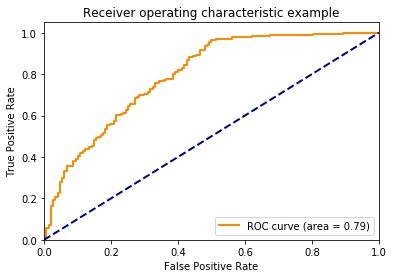

In [136]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw,\
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [144]:
y.value_counts()

1    332
0    148
Name: Loan_Status, dtype: int64

In [172]:
#y.append(pd.Series())
y_new=y.append(pd.Series(np.zeros(148))).reset_index(drop=True).copy()

In [171]:
X_new=X.append(X[y==0]).copy()

In [176]:
model=LogisticRegression()
model.fit(X_new,y_new)
model.score(X_new,y_new)

C:\Users\48585\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7277070063694268

In [178]:
confusion_matrix(y_new,model.predict(X_new))

array([[162, 134],
       [ 37, 295]], dtype=int64)

In [180]:
print(classification_report(y_new,model.predict(X_new)))

              precision    recall  f1-score   support

         0.0       0.81      0.55      0.65       296
         1.0       0.69      0.89      0.78       332

   micro avg       0.73      0.73      0.73       628
   macro avg       0.75      0.72      0.71       628
weighted avg       0.75      0.73      0.72       628



In [182]:
model=LogisticRegression(class_weight="balanced")
model.fit(X,y)
model.score(X,y)

C:\Users\48585\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7541666666666667

In [183]:
confusion_matrix(y,model.predict(X))

array([[ 84,  64],
       [ 54, 278]], dtype=int64)

In [184]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion="entropy")
dtc.fit(X,y)
print("training Score",dtc.score(X,y))
print("testing Score",dtc.score(X_test,y_test))

training Score 1.0
testing Score 0.7014925373134329


In [188]:
print(confusion_matrix(y,dtc.predict(X),labels=[1,0]))

[[332   0]
 [  0 148]]


In [189]:
print(confusion_matrix(y_test,dtc.predict(X_test),labels=[1,0]))

[[71 19]
 [21 23]]


In [193]:
!pip install graphviz

In [192]:
#export the plot
from sklearn.tree import export_graphviz
export_graphviz(dtc,feature_names=X.columns, out_file="tree.dot",  
                filled=True, rounded=True,
                special_characters=True)

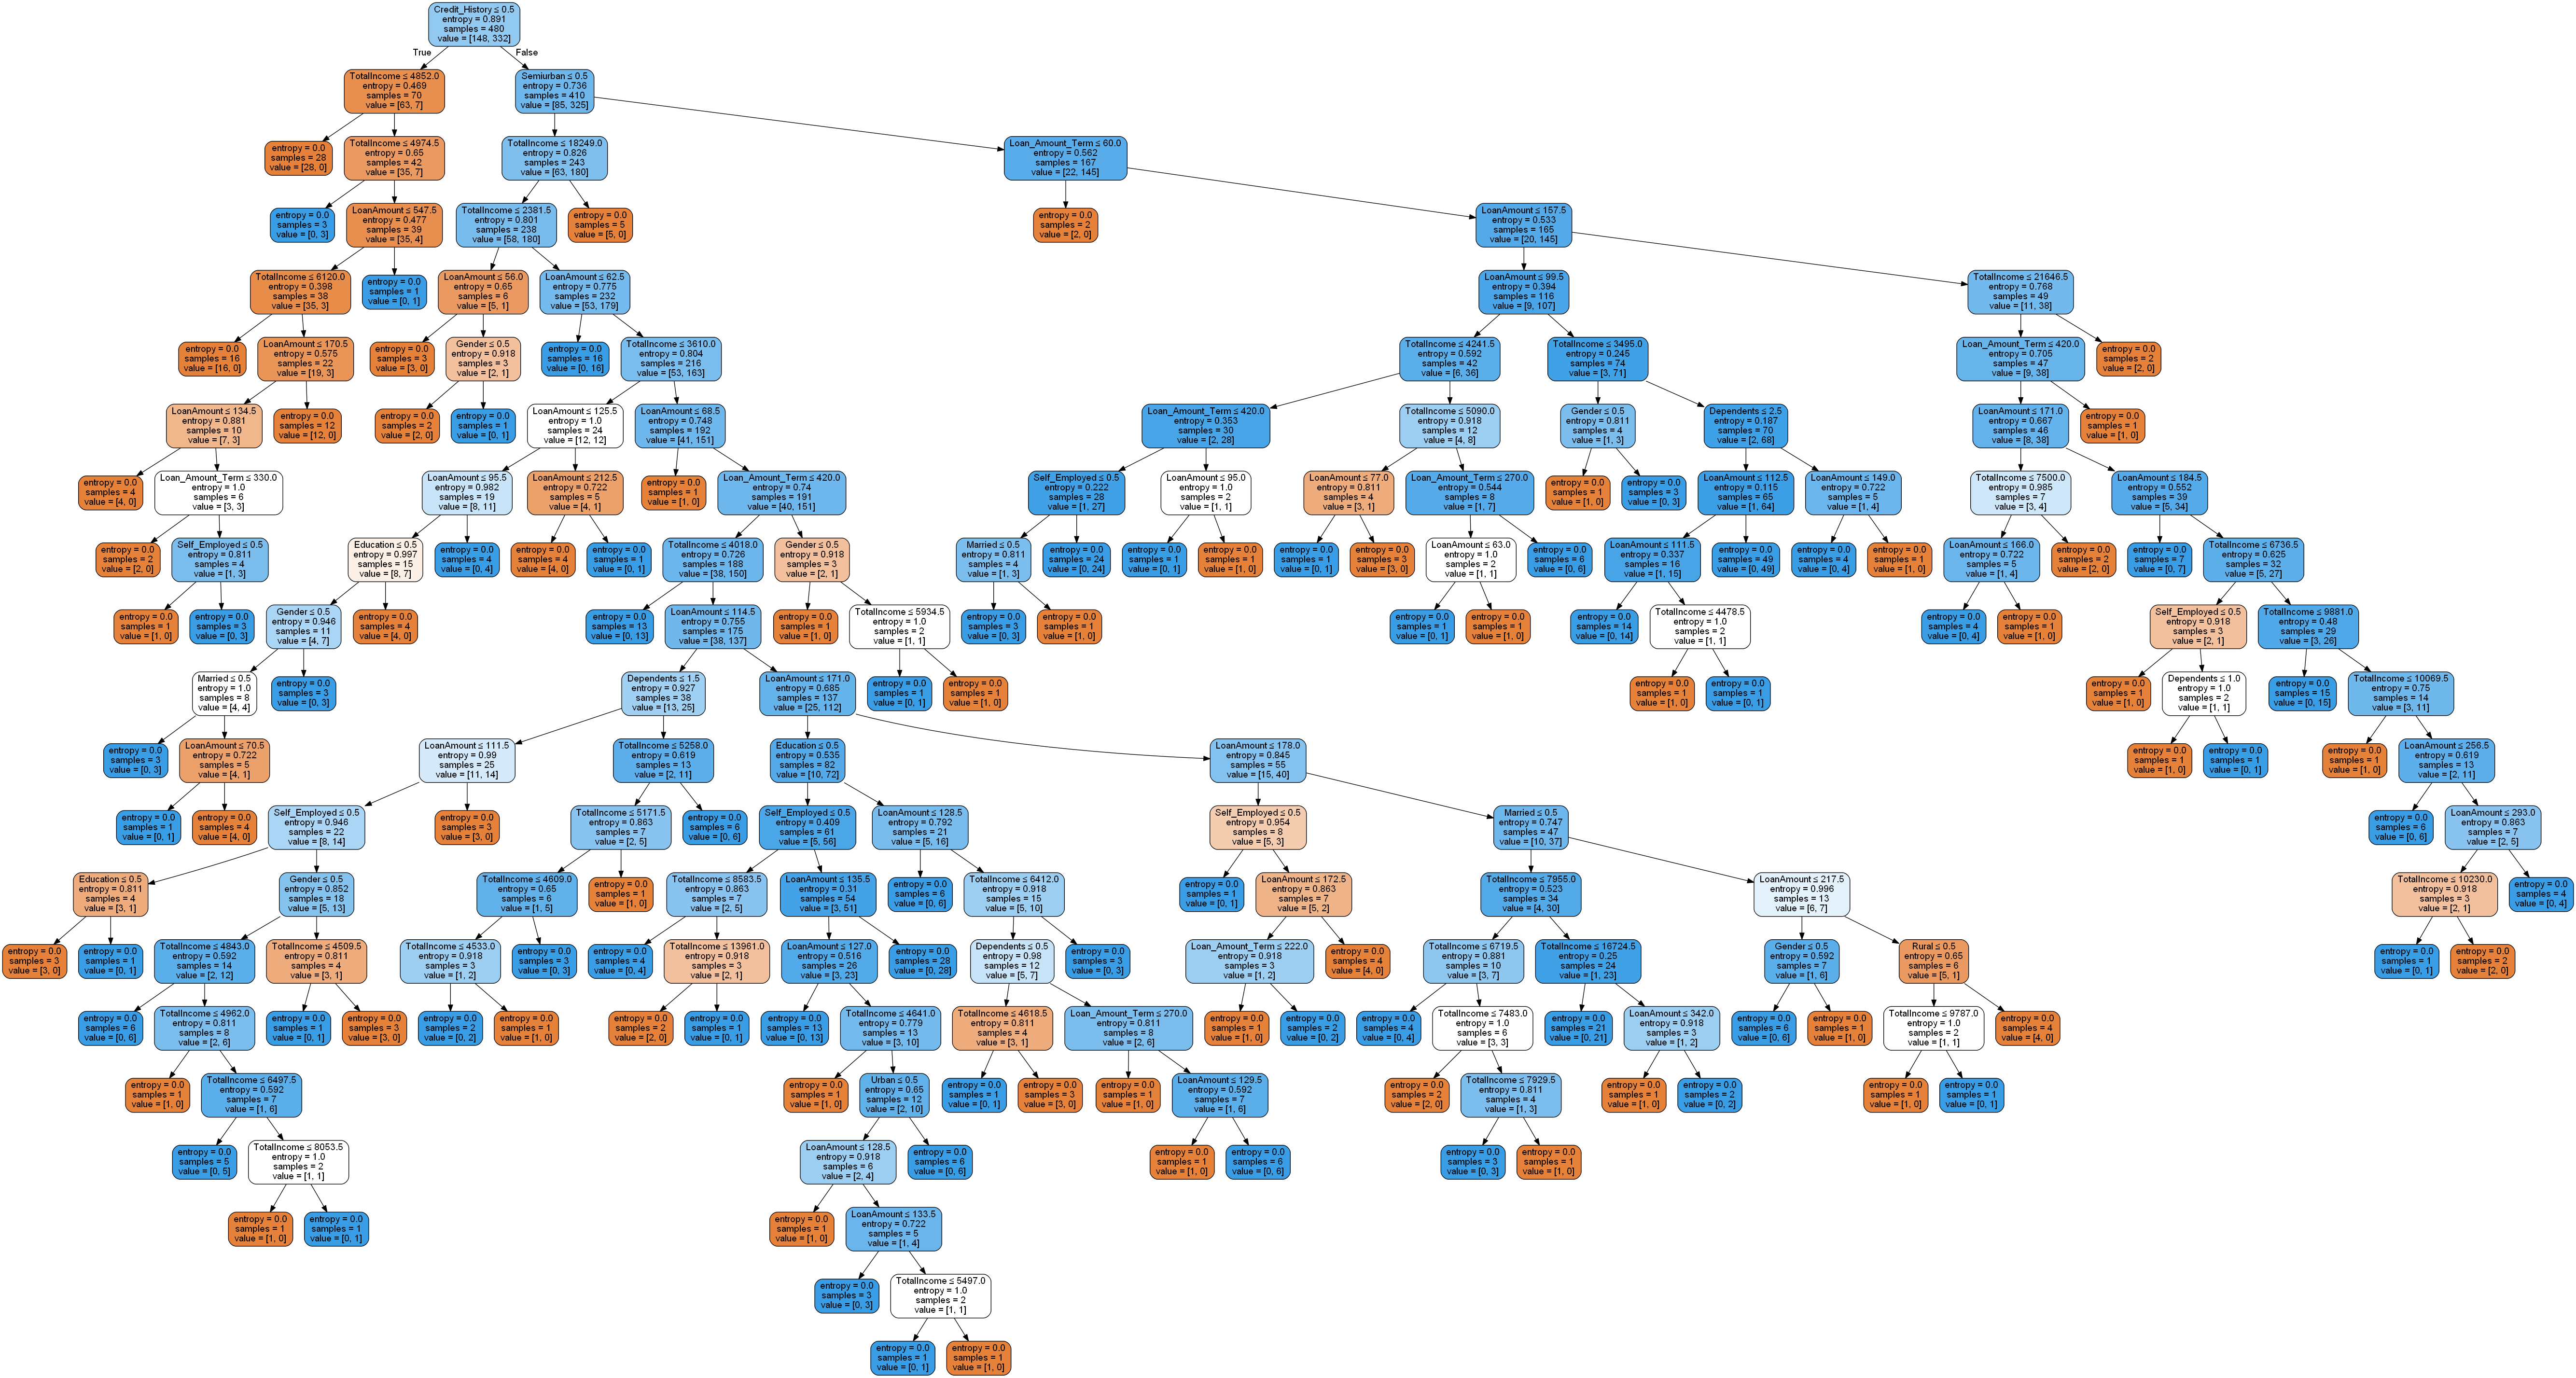

In [191]:
# generate plot
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtc,feature_names=X.columns, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [195]:
for depth in range(1,20):
    print("depth",depth)
    dtc=DecisionTreeClassifier(criterion="entropy",max_depth=depth,\
                              class_weight="balanced")
    dtc.fit(X,y)
    print("training Score",dtc.score(X,y))
    print("testing Score",dtc.score(X_test,y_test))

depth 1
training Score 0.8083333333333333
testing Score 0.8134328358208955
depth 2
training Score 0.8083333333333333
testing Score 0.8134328358208955
depth 3
training Score 0.8291666666666667
testing Score 0.7761194029850746
depth 4
training Score 0.8395833333333333
testing Score 0.7835820895522388
depth 5
training Score 0.8458333333333333
testing Score 0.7835820895522388
depth 6
training Score 0.8458333333333333
testing Score 0.7388059701492538
depth 7
training Score 0.8416666666666667
testing Score 0.6940298507462687
depth 8
training Score 0.8541666666666666
testing Score 0.7238805970149254
depth 9
training Score 0.8791666666666667
testing Score 0.7164179104477612
depth 10
training Score 0.8875
testing Score 0.7164179104477612
depth 11
training Score 0.9291666666666667
testing Score 0.7164179104477612
depth 12
training Score 0.9479166666666666
testing Score 0.7014925373134329
depth 13
training Score 0.9479166666666666
testing Score 0.7164179104477612
depth 14
training Score 0.9791666

In [196]:
dtc=DecisionTreeClassifier(criterion="entropy",max_depth=4,\
                              class_weight="balanced")
dtc.fit(X,y)
print("training Score",dtc.score(X,y))
print("testing Score",dtc.score(X_test,y_test))
print(confusion_matrix(y,dtc.predict(X),labels=[1,0]))
print(confusion_matrix(y_test,dtc.predict(X_test),labels=[1,0]))

training Score 0.8395833333333333
testing Score 0.7835820895522388
[[327   5]
 [ 72  76]]
[[84  6]
 [23 21]]


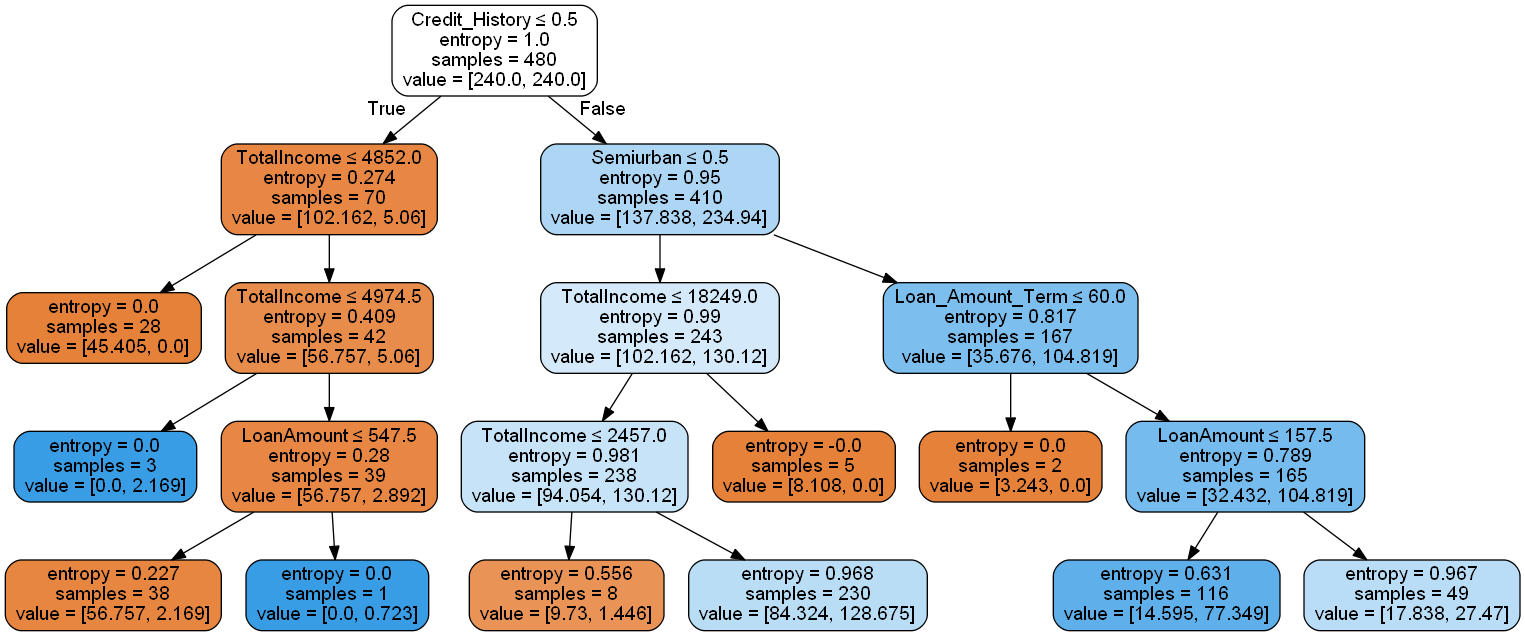

In [197]:
# generate plot
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtc,feature_names=X.columns, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


# Ensemble Logistic and Decision Tree

In [230]:
y_hat_dtc=dtc.predict_proba(X)
y_hat_lr=lr.predict_proba(X)

In [231]:
y_hat_avg=[]
for i,j in zip(y_hat_dtc[:,1],y_hat_lr[:,1]):
    avg=i*0.3+j*0.7
    if avg>0.58:
        y_hat_avg.append(1)
    else:
        y_hat_avg.append(0)

In [232]:
accuracy(y,y_hat_avg)

0.8270833333333333

In [233]:
y_hat_dtc=dtc.predict_proba(X_test)
y_hat_lr=lr.predict_proba(X_test)
y_hat_avg=[]
for i,j in zip(y_hat_dtc[:,1],y_hat_lr[:,1]):
    avg=i*0.3+j*0.7
    if avg>0.58:
        y_hat_avg.append(1)
    else:
        y_hat_avg.append(0)
print(accuracy(y_test,y_hat_avg))

0.7910447761194029
